In [4]:
library(dplyr)
library(tidyr)

library(ggplot2)
library(ggtree)
library(castor)
library(treeio)
library(reshape2)

library(gridExtra)
library(cowplot)
library(egg)
library(grid)
#install.packages("TreeTools")
library("TreeTools")




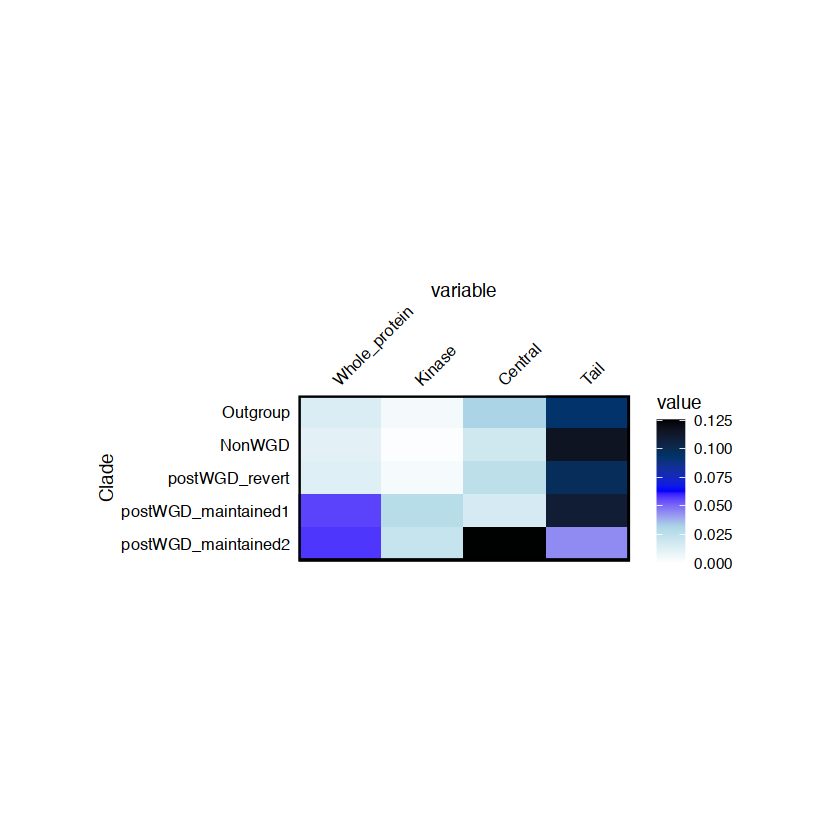

In [40]:
heatmap_data = read.csv("../01_codeml/Model_M02_branch/dSdNvalues_4heatmap.csv")
heatmap_data$Clade = factor(heatmap_data$Clade,levels= c("postWGD_maintained2","postWGD_maintained1","postWGD_revert","NonWGD","Outgroup") )
data_l = melt(heatmap_data,id.vars=c("Clade"))
#head(data_l)



heatmap = ggplot(data_l)+   
geom_tile(aes(variable,Clade,fill = value))  + 
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF"),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(linewidth=1.0,color="#000000"),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=0.5,
    axis.ticks = element_blank(),
    axis.text.x = element_text(size=9.5,color="#000000",angle=45,hjust=0,vjust=0),
    axis.text.y = element_text(size=9.5,color="#000000")
)+ 
scale_x_discrete(expand=c(0,0),position="top") + 
scale_y_discrete(expand=c(0,0),position="left") +
scale_fill_gradientn(colors=c("#FFFFFF","#ADD8E6","#0000FF","#003366","#000000"),limits=c(0,0.1255))

p <-set_panel_size(heatmap ,width  = unit(7, "cm"),height = unit(3.5, "cm")) 
grid.newpage()
grid.draw(p) 

ggsave(plot=p,"./Results/dSdNvalues_heatmap.pdf" ,width=unit(7,"cm"),height=unit(5,"cm"))

